# **1. Import Library**

In [15]:
# Import Library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# **2. Memuat Dataset dari Hasil Clustering**

In [16]:
# Memuat Dataset dari Hasil Clustering
df = pd.read_csv('clustering_pekerja.csv')

In [17]:
# Encode Seluruh kolom kategorikal
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [18]:
print(df.head())

   provinsi  tahun   upah        ump  daerah_x  jenis_x      peng  jenis_y  \
0         0   2015  11226  1900000.0         0        0  395136.0        0   
1         0   2015  11226  1900000.0         0        0  395136.0        0   
2         0   2015  11226  1900000.0         0        0  395136.0        0   
3         0   2015  11226  1900000.0         0        0  395136.0        0   
4         0   2015  11226  1900000.0         0        0  395136.0        0   

   daerah_y  periode        gk  Cluster  
0         2        0  293697.0        0  
1         2        1  302128.0        0  
2         0        0  297479.0        0  
3         0        1  306737.0        0  
4         1        0  296406.0        0  


# **3. Data Splitting**

In [19]:
# Data Splitting
X = df.drop('Cluster', axis=1)
y = df['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nJumlah Data Training:", len(X_train))
print("Jumlah Data Testing:", len(X_test))


Jumlah Data Training: 3774
Jumlah Data Testing: 944


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

In [20]:
# Model 1 dengan Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# Model 2 dengan KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

## **b. Evaluasi Model Klasifikasi**

In [28]:
# Evaluasi Model Random Forest
y_pred_rf = rf.predict(X_test)
print("Evaluasi Random Forest")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score (weighted): {f1_score(y_test, y_pred_rf, average='weighted'):.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=[f'Cluster {i}' for i in range(1,5)]))

Evaluasi Random Forest
Accuracy: 0.9809
F1-Score (weighted): 0.9809

Classification Report:
              precision    recall  f1-score   support

   Cluster 1       1.00      0.99      0.99       281
   Cluster 2       0.97      0.97      0.97       249
   Cluster 3       0.98      1.00      0.99       241
   Cluster 4       0.97      0.96      0.97       173

    accuracy                           0.98       944
   macro avg       0.98      0.98      0.98       944
weighted avg       0.98      0.98      0.98       944



Confusion Matrix:
[[279   0   2   0]
 [  1 241   2   5]
 [  0   1 240   0]
 [  0   7   0 166]]


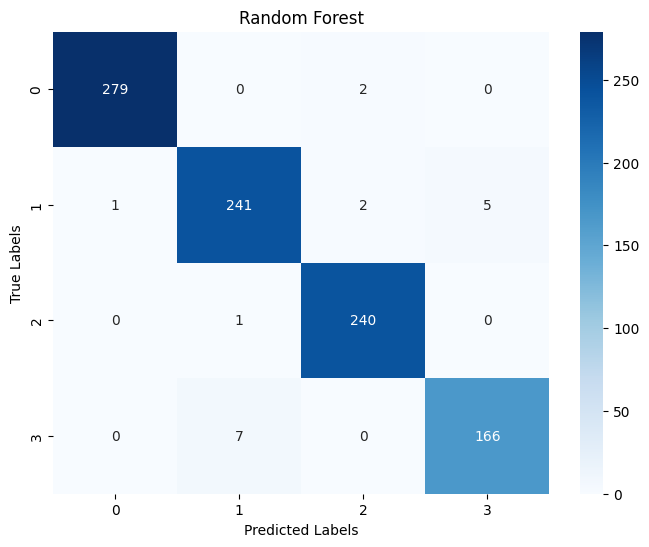

In [31]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Plot Confusion Matrix Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=list(set(y)), yticklabels=list(set(y)))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Random Forest")
plt.show()

In [33]:
# Evaluasi Model KNN
y_pred_knn = knn.predict(X_test)
print("Evaluasi KNN")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"F1-Score (weighted): {f1_score(y_test, y_pred_knn, average='weighted'):.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_knn,
                          target_names=[f'Cluster {i}' for i in range(1,5)]))

Evaluasi KNN
Accuracy: 0.9492
F1-Score (weighted): 0.9490

Classification Report:
              precision    recall  f1-score   support

   Cluster 1       0.97      0.98      0.97       281
   Cluster 2       0.94      0.91      0.93       249
   Cluster 3       0.93      0.94      0.94       241
   Cluster 4       0.95      0.97      0.96       173

    accuracy                           0.95       944
   macro avg       0.95      0.95      0.95       944
weighted avg       0.95      0.95      0.95       944



Confusion Matrix:
[[275   1   5   0]
 [  2 227  11   9]
 [  7   7 227   0]
 [  0   6   0 167]]


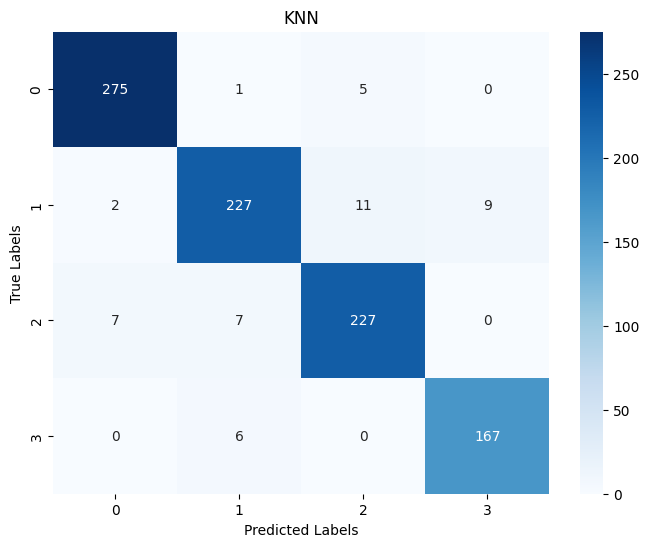

In [35]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

# Plot Confusion Matrix KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=list(set(y)), yticklabels=list(set(y)))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("KNN")
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

### e. Analisis Hasil Evaluasi Model Klasifikasi

#### 1. **Perbandingan Hasil Evaluasi**  
- **Random Forest**  
  - Akurasi: **98.09%**  
  - F1-Score: **98.09%** (Presisi dan Recall Seimbang)  
  - Performa Terbaik pada  
    - Cluster 1: Precision 1.00 & Recall 0.99  
    - Cluster 3: Recall 1.00  

- **KNN**  
  - Akurasi: **94.92%** (Lebih Rendah dari RF)  
  - F1-Score: **94.90%**  
  - Performa Terendah pada  
    - Cluster 2: Recall 0.91  
    - Cluster 3: Precision 0.93  

---

#### 2. **Identifikasi Kelemahan Model**  
**A. Random Forest**  
- **Cluster 4**:  
  - 7 sampel salah ke Cluster 2 (Recall: 96%)  
  - Penyebabnya kemungkinan overlap fitur atau outlier pada Cluster 4  

**B. KNN**  
- **Cluster 2 & 3**:  
  - 11 sampel Cluster 2 ke Cluster 3 (Precision Cluster 2: 94%)  
  - 7 sampel Cluster 3 ke Cluster 1/2 (Recall Cluster 3: 94%)
  - Kemungkinan ada noise data/fitur nya tidak dinormalisasi  

**C. Overfitting/Underfitting**  
- Tidak Ada Overfitting (Akurasi test set tinggi pada kedua model)
- Tidak Ada Underfitting (Performa stabil di semua cluster)

---

#### 3. **Rekomendasi**  
1. Hyperparameter Tuning
2. Untuk KNN  
   - Normalisasi Data misalnya dengan StandardScaler
   - Mencari nilai K optimal dengan GridSearchCV  
3. Coba algoritma lain seperti XGBoost  
4. Penambahan Data  

---

#### **Kesimpulan**  
- Random Forest menunjukkan performa lebih unggul dengan akurasi 98.09% dibanding KNN (94.92%)